In [1]:
import pandas as pd

train = pd.read_csv("../data/train.csv", index_col=0)
train_features = train.iloc[:, :5]
train_labels = train.iloc[:, 5].to_numpy()

test = pd.read_csv("../data/test.csv", index_col=0)
test_features = train.iloc[:, :5]
test_labels = train.iloc[:, 5].to_numpy()

sample = pd.read_csv("../data/sample_submission.csv")

## Linear regression classifier
1. Ordinary least squares method

In [2]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(train_features, train_labels)

LinearRegression()

'there are 0 predicted values less than -0.1'

'there are 0 predicted values greater than 1'

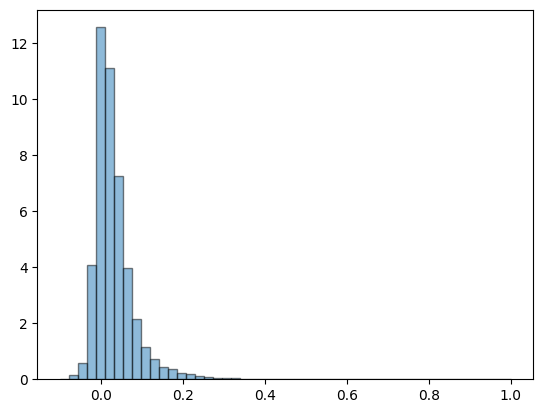

In [3]:
import matplotlib.pyplot as plt
import numpy as np

reg_pred = reg.predict(test_features)

th1 = -0.1
display(f"there are {np.where(reg_pred<th1)[0].shape[0]} predicted values less than {th1}")

th2 = 1
display(f"there are {np.where(reg_pred>th2)[0].shape[0]} predicted values greater than {th2}", )

left, right = -0.1, 1
plt.hist(reg_pred, bins=50, range=(left, right), density=True, edgecolor='black', alpha=0.5, label="Predicted values")

# the main problem is to choose threshold
threshold = 0.1
reg_pred_binary = (reg_pred >= threshold).astype(int)

We should choose threshold to turn continious data to binary one. 

All metric functions take true results, then predicted ones

In [7]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


display(accuracy_score(test_labels, reg_pred_binary))
display(recall_score(test_labels, reg_pred_binary))
display(f1_score(test_labels, reg_pred_binary))
display(confusion_matrix(test_labels, reg_pred_binary))

0.9178144991560566

0.3884844473858372

0.22938647909339585

array([[43458,  3020],
       [  924,   587]])